Name: Barry O' Dubhain

Student ID: 21384401

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

This is a description of the what the attributes represent.

#### Input variables:
#### bank client data:
1. **age**: age of client (numeric)
2. **job**: type of job (categorical: 'admin.','blue collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. **marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. **education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. **default**: has credit in default? (categorical: 'no','yes','unknown')
6. **balance**: the balance in the clients current account
7. **housing**: has housing loan? (categorical: 'no','yes','unknown')
8. **loan**: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
9. **contact**: contact communication type (categorical: 'cellular','telephone')
10. **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11. **day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
12. **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
13. **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. **previous**: number of contacts performed before this campaign and for this client (numeric)
16. **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Output variable (desired target):
17. **subscribed**: has the client subscribed a term deposit? (binary: 'yes','no')

source: https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [3]:
df = pd.read_csv("./bank.csv")

In [4]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [5]:
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [6]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [7]:
df_org = df.copy(deep=True)

### Drop columns that are not useful

I considered keeping the 'contact' feature because people may respond to various means of communication differently, for example, written vs spoken communication. On inspection I found that all examples were of 'cellular' or 'telephone', whether the communication was spoken or via text was not specified. I therefore determined this feature to be unuseful.

In [8]:
print(df_org['contact'].unique())

['cellular' 'telephone' nan]


In [9]:
df.drop('contact', axis=1, inplace=True)

### Encode Ordinal Categorical Attributes 

The **education** feature is the only truely ordinal feature in the dataset.

The **job** attribute is partially ordinal as it will presumably correlate with income level but to set ordinal values would be a subjective exercise so I have therefore decided to treat it as a non-ordinal categorical feature.

In [10]:
print(df_org['education'].unique())

['tertiary' 'secondary' nan 'primary']


In [11]:
print(df_org['education'].value_counts())
print(df_org['education'].isna().sum())

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64
104


There is no way to deal with a missing value in an ordinal feature other than to drop the row

In [12]:
before_len = len(df)
df = df[df['education'].notna()]
print(f"Number of examples dropped: {before_len - len(df)}")

Number of examples dropped: 104


In [13]:
# Create a mapper

scale_mapper = {
    "primary": 0,
    "secondary": 1,
    "tertiary": 2
}

df['education'] = df['education'].replace(scale_mapper)

df.tail()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1994,26.0,student,single,1,no,655,no,no,16,sep,190,1,-1,0,NaN,yes
1996,28.0,admin.,single,1,no,127,no,no,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,0,no,1154,no,no,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,0,no,4343,yes,no,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,1,no,6403,no,no,22,sep,208,2,-1,0,NaN,yes


 ### One-Hot Encode All Other Categorical Attributes

The **marital**, **housing**, **default**, **loan**, **month**, **job**, **poutcome** features are categorical/boolean features and will be one-hot encoded. None of these features have nan values. job has 10 NaN values but because I have decided to treat this feature as non-ordinal the NaN values can be treated as a category.

In [14]:
print(f"default: {df_org['default'].unique()}\
\nhousing: {df_org['housing'].unique()}\
\nloan: {df_org['loan'].unique()}\
\nmarital: {df_org['marital'].unique()}\
\nmonth: {df_org['month'].unique()}\
\nday: {df_org['day'].unique()}\
\njob: {df_org['job'].unique()}\
\npoutcome: {df_org['poutcome'].unique()}")

default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
marital: ['single' 'divorced' 'married']
month: ['apr' 'dec' 'feb' 'jan' 'mar' 'may' 'nov' 'oct' 'aug' 'jul' 'jun' 'sep']
day: [ 1  2  3 20  4  7  9 10 14 16 17 18 21 24 28 29 30  5  6 11 13 19 26 27
  8 12 22 25 15 23 31]
job: ['technician' 'retired' 'blue-collar' 'self-employed' 'services'
 'management' 'admin.' 'unemployed' 'student' 'entrepreneur' 'housemaid'
 nan]
poutcome: ['failure' 'other' 'success' nan]


In [15]:
df = pd.get_dummies(df, columns=['marital', 'housing', 'default', 'loan', 'month', 'job', 'day', 'poutcome'], drop_first=True)
df.head()

,age,education,balance,duration,campaign,pdays,previous,subscribed,marital_married,marital_single,...,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,poutcome_other,poutcome_success
0,32.0,2,392,957,2,131,2,no,0,1,...,0,0,0,0,0,0,0,0,0,0
1,39.0,1,688,233,2,133,1,no,0,0,...,0,0,0,0,0,0,0,0,0,0
2,59.0,1,1035,126,2,239,1,no,1,0,...,0,0,0,0,0,0,0,0,0,0
3,47.0,1,398,274,1,238,2,no,1,0,...,0,0,0,0,0,0,0,0,0,0
4,54.0,1,1004,479,1,307,1,no,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
print(list(df.columns.values))

['age', 'education', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'subscribed', 'marital_married', 'marital_single', 'housing_yes', 'default_yes', 'loan_yes', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31', 'poutcome_other', 'poutcome_success']


### Treatment of Missing Values in Numerical Columns

In [17]:
for idx, att in enumerate(list(df.columns.values)):
    if df[att].isna().sum() > 0: 
        print(f"{att} : {df[att].isna().sum()}")

age : 12


In [18]:
df['age'].unique()

array([32., 39., 59., 47., 54., 46., 34., 45., 58., 49., 36., 48., 35.,
       30., 53., 40., 57., 37., 38., 56., 24., 31., 43., 27., 33., 51.,
       50., 42., 22., 64., 52., 29., 44., 55., 26., 60., 41., 28., nan,
       25., 63., 69., 84., 62., 23., 75., 73., 19., 61., 86., 78., 76.,
       77., 70., 68., 65., 21., 67., 66., 82., 71., 80., 79., 74., 20.,
       72., 81.])

In [19]:
print(f"{round(df['age'].isna().sum() / len(df), 2)}% of the 'age' feature is missing values,\
\nthis is less than 25% therefore we will not be dropping this column.")

0.01% of the 'age' feature is missing values,
this is less than 25% therefore we will not be dropping this column.


In order to replace the missing values in the age feature we could just find the mean value for that column and replace the missing values with that: df['age'].fillna(df['age'].mean(), inplace=True) but there are more accurate methods available so instead, we will look to other features that may provide an indication of the age of the example. We will print the box plots of what we deem to be the most indicative features to comfirm our assumptions. I have chosen marital status, whether an example is retired, student or neither and home ownership as indicators of age.

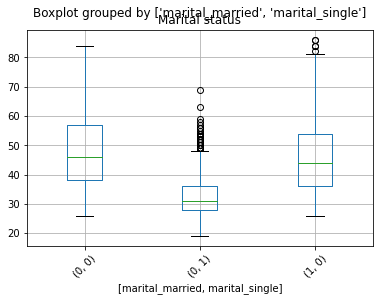

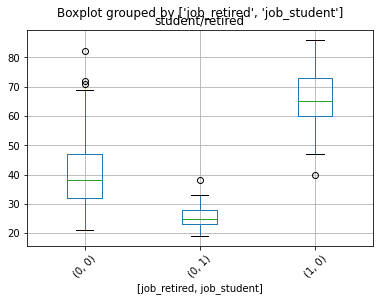

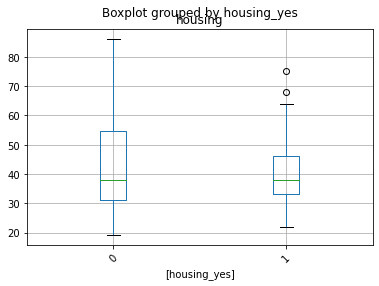

In [20]:
df.boxplot(column='age', by=['marital_married', 'marital_single'], rot=45)
plt.title("Marital status")
plt.show()

df.boxplot(column='age', by=['job_retired', 'job_student'], rot=45)
plt.title("student/retired")
plt.show()

df.boxplot(column='age', by=['housing_yes'], rot=45)
plt.title("housing")
plt.show()

We can see from the box plots that both marital status and job student/retired are good indicators of age but housing is not. We will therefore ignore home ownership for the purposed of estimating the age of examples.

In [21]:
ptable = df.pivot_table(values='age', 
                        index=['job_retired', 'job_student', 'marital_married', 'marital_single'],
#                         columns=[],  
                        aggfunc=np.median)
print(ptable)

                                                         age
job_retired job_student marital_married marital_single      
0           0           0               0               43.0
                                        1               32.0
                        1               0               41.0
            1           0               0               38.0
                                        1               25.0
                        1               0               33.0
1           0           0               0               67.0
                                        1               60.5
                        1               0               65.0


In [24]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[
        x['marital_married'], x['marital_single'], x['marital_married'], x['marital_single']]

In [25]:
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

TypeError: "value" parameter must be a scalar, dict or Series, but you passed a "DataFrame"